# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)

В данной работе мы предлагаем вам ознакомиться на практике с очень важной моделью - Линейной регрессией. 
Мы будем работать с данными [Socr](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights). Данный датасет включает в себя 25 000 записей человеческих высот и весов. Эти данные были получены в 1993 году Обследованием роста 25 000 детей от рождения до 18 лет, набранных из центров здоровья матери и ребенка (MCHC) и школ.

Если у вас нет библиотеки **seaborn** просьба установить ее командой 

``` sh
conda install seaborn
```

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Для начала мы немного поучимся работать с данными. Это нам понадобится в дальнейшем.

### Pandas

Основными структурами данных в Pandas являются классы Series и DataFrame. Seuies -- одномерный индексированный массив данных некоторого фиксированного типа. DataFrame – это структура данных, представляющая собой таблицу. Тут все просто. Данный инструмент дает огромные возможности в первичной обраьотке данных.

Для того чтобы считать данные используется команда read_csv(). 

In [ ]:
data = pd.read_csv('./data/weights_heights.csv', index_col='Index')

После этого стоит построить гистограммы распределения признаков - это позволяет понять природу признака. Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Вы уже умеете строить гистограммы в matplotlib. Но это же можно делать с помощью встроенного в  pandas методом plot Pandas DataFrame с аргументом.

* y='Height' - тот признак, распределение которого мы строим
* kind='hist' - означает, что строится гистограмма
* color='red' - цвет

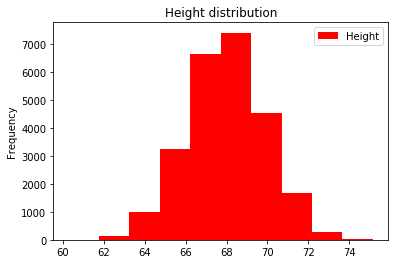

In [2]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height distribution')

### Задание 1 

* Посмотрите на первые 5 записей с помощью метода head Pandas DataFrame, это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.).*
* Нарисуйте гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделайте гистограмму синей, подпишите картинку.

In [ ]:
# Первые 5 записей

In [ ]:
# Постройте график

Применение функции к каждому столбцу: **apply**

Пример: С помощью известной вам функции посмотри максимальные значения в колонках.

In [ ]:
data.apply(np.max)

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: какова средний рост человека? (Данные в дюймах)

In [ ]:
data['Height'].mean()

Датафреймы можно индексировать по названию столбца или строки и по порядковому номеру. Для индексации по названию используется метод loc, по номеру — iloc.

In [2]:
data.loc[0:5, 'Weight']

Index
1    112.9925
2    136.4873
3    153.0269
4    142.3354
5    144.2971
Name: Weight, dtype: float64

In [2]:
data.iloc[0:5, 1]

Index
1    112.9925
2    136.4873
3    153.0269
4    142.3354
5    144.2971
Name: Weight, dtype: float64

Теперь попробуйте вывести всех людей у кого вес больше 120(футов) и посчитать их количество. 
_Подсказка_: умная индексация как в numpy тут есть.

In [ ]:
#  Ваш код здесь

Рассмотрим еще один интересный способ анализа данных. Изучение зависимостей в признаках. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или pairplot библиотеки Seaborn.

Для того, чтобы у нас была зависимость в данных, введем новый признак - индекс массы тела.

In [ ]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

### Задание  2

Примените функцию make_bmi

In [ ]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Постройте картинку, на которой будут отображены попарные зависимости признаков ,
'Height', 
'Weight' и 
'BMI' друг от друга. Используйте метод pairplot библиотеки Seaborn.

In [ ]:
# Ваш код здесь

### Задание  3
Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях.

In [ ]:
# Ваш код здесь
def weight_category(weight):
    pass

In [ ]:
data['weight_cat'] = # Ваш код здесь

Посмотрите как удобно можно анализировать категориальные признаки:

In [ ]:
data['weight_cat'].value_counts()

Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

In [ ]:
# Ваш plot здесь

## Минимизация среднеквадратичной ошибки

Надеюсь, что вы уже знаете, что же такое линейная регрессия и как она решается.
В простейшей постановке задача прогноза значения вещественного признака по прочим признакам  решается минимизацией квадратичной функции ошибки. Это довольна простая задача. 
Сейчас мне хотелось бы скорее показать, что вообще происходит в регресси. Так что если будет совсем не понятно, то пишите, добавлю код или разъеснения. 

Немного разъеснения с картинками, чтобы удостовериться, что вы понимаете о чем речь.

$y = \beta_0 + \beta_1 * x$:


Коэффициенты оцениваются с использованием критерия наименьших квадратов, что означает, что мы минимизируем сумму квадратов остатков (или «сумма квадратов ошибок»):

<img src="img/mse.png" alt="" style="width: 600px;"/>
Ответим на важный вопрос: какие элементы присутствуют на диаграмме?

* Черными точками являются наблюдаемые значения x и y.
* Синяя линия - наша линия наименьших квадратов.
* Красные линии - это остатки, которые являются расстояниями между наблюдаемыми значениями и линией наименьших квадратов
Как коэффициенты модели связаны с линией наименьших квадратов?
$ \beta_0 $ - это сдвиг (значение $ y $ при $ x $ = 0)
$ \beta_1 $ - наклон (изменение в $ y $, деленное на изменение в $ x $)

<img src="img/lr.png" alt="" style="width: 600px;"/>


### Задача * (Посмотреть ее нужно всем)

Попробуйте написать функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [ ]:
def error(w0, w1):
    # Ваш код здесь
    pass

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал( указанный выше
error($w_0$, $w_1$). Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

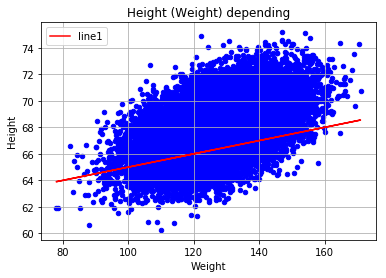

In [2]:
x=np.array(data['Weight'])
w0,w1=60,0.05
y1 = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y1, color="red", label="line1")
plt.grid(True)
plt.legend(loc='upper left')

### Задание

Добавьте на график еще одну пряму с другим весом зеленого цвета.

In [ ]:
# Ваш код здесь

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Посмотрим график зависимости функции потерь


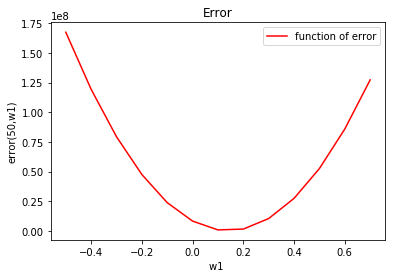

In [2]:
w0=50.
w = np.arange(-0.5, 0.8, 0.1)

err = [error(w0,w1) for w1 in w]
plt.title('Error')
plt.xlabel('w1 ')
plt.ylabel('error(50,w1)')

plt.plot(w, err, color="red", label="function of error")
plt.legend()

Видно, что у нас есть явный минимум функции. Попробуем найти такое значение w1, чтобы error была наименьешей

Используем немного магии и оптимизации, чтобы получить желаемый вес $w_1$ в диапазоне [-5,5].

In [2]:
import scipy
from scipy.optimize import minimize_scalar

def error_wrap(w1):
    return error(50,w1)

min=minimize_scalar(error_wrap, bounds=(-5,5), method='bounded')
w1_opt=min.x
print(min.x, min.fun)

0.141091651151 79510.63244


Теперь когда у нас есть наше оптимальное значение веса, мы можем пострить регрессию роста в зависимости от веса. То есть для определенных значений веса мы можем прежсказать рост ( на данном промежутке). Это если кто не понял, что тут вообще происходит.

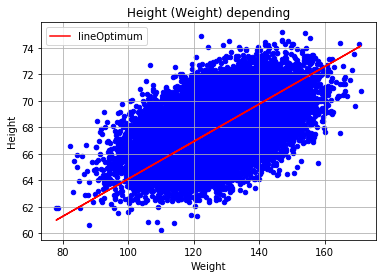

In [2]:
x=np.array(data['Weight'])

w0,w1=50,w1_opt
y = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')

Если вы руками написали функционал ошибок и получили такие же графики как и у нас, то вы правильно сделали звездочку. Данное задание было направлено на понимание данных и восприятие линейной регресси. Это понадобится на следующей лекции, где уже будут представлены нейронные сети.

По всем вопросам : [```t.khakhulin@gmail.com```](mailto:t.khakhulin@gmail.com) или в телеграме [t.me/vitaminotar](https://t.me/vitaminotar)

#### Дополнительное чтение

Все же в данном занятии линейная регрессия была раскрыта довольно поверхностно. Для ознакомления рекомендую [статью](https://habrahabr.ru/company/ods/blog/323890/) из блога ods.